In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
totaldataset = pd.read_csv("drive/My Drive/ocr_data/data.csv")

In [ ]:
import random
# Original dataset has 92,000 rows and 1025 cols
# selection 92000 rows at random for testing for now
a=random.sample(range(0,92000), 92000)
dataset=totaldataset.loc[a]

In [ ]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,pixel_0010,pixel_0011,pixel_0012,pixel_0013,pixel_0014,pixel_0015,pixel_0016,pixel_0017,pixel_0018,pixel_0019,pixel_0020,pixel_0021,pixel_0022,pixel_0023,pixel_0024,pixel_0025,pixel_0026,pixel_0027,pixel_0028,pixel_0029,pixel_0030,pixel_0031,pixel_0032,pixel_0033,pixel_0034,pixel_0035,pixel_0036,pixel_0037,pixel_0038,pixel_0039,...,pixel_0985,pixel_0986,pixel_0987,pixel_0988,pixel_0989,pixel_0990,pixel_0991,pixel_0992,pixel_0993,pixel_0994,pixel_0995,pixel_0996,pixel_0997,pixel_0998,pixel_0999,pixel_1000,pixel_1001,pixel_1002,pixel_1003,pixel_1004,pixel_1005,pixel_1006,pixel_1007,pixel_1008,pixel_1009,pixel_1010,pixel_1011,pixel_1012,pixel_1013,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_02_kha
56264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_29_waw
32199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_17_tha
49748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_25_ma
71341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_36_gya


In [ ]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
num_pixels = X.shape[1]
# 46 characters, consonants "ka" to "gya", and the digits 0 to 9
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [ ]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

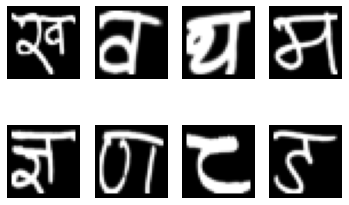

In [ ]:
for i in range(1,9):
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binecoder = LabelBinarizer()
Y = binecoder.fit_transform(y)

In [ ]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [ ]:
def cnn_model():
    model = Sequential()
    # 4,4 is the filter size
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))

    # convolution gives 2-D data as output where as Dense layer needs 1-D data that's why we need to flatedn it
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(64, activation='relu', name="dense_2"))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', name="dense_3"))
    # output layer
    model.add(Dense(num_classes, activation='softmax', name="model_output"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 29, 29, 32)        544       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 12, 12, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2

In [ ]:
early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 25
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/10
2356/2356 - 8s - loss: 1.0982 - accuracy: 0.6886 - val_loss: 0.3414 - val_accuracy: 0.8979
Epoch 2/10
2356/2356 - 9s - loss: 0.3397 - accuracy: 0.8967 - val_loss: 0.2096 - val_accuracy: 0.9389
Epoch 3/10
2356/2356 - 8s - loss: 0.2267 - accuracy: 0.9318 - val_loss: 0.1520 - val_accuracy: 0.9561
Epoch 4/10
2356/2356 - 8s - loss: 0.1722 - accuracy: 0.9473 - val_loss: 0.1409 - val_accuracy: 0.9601
Epoch 5/10
2356/2356 - 8s - loss: 0.1397 - accuracy: 0.9565 - val_loss: 0.1219 - val_accuracy: 0.9668
Epoch 6/10
2356/2356 - 7s - loss: 0.1192 - accuracy: 0.9636 - val_loss: 0.1241 - val_accuracy: 0.9639
Epoch 7/10
2356/2356 - 8s - loss: 0.1004 - accuracy: 0.9683 - val_loss: 0.1239 - val_accuracy: 0.9677


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.68%


In [ ]:
predictions = model.predict(X_test)

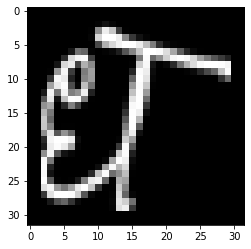

In [ ]:
test_img = X_test.reshape(X_test.shape[0],img_width,img_height)
plt.imshow(test_img[0],cmap=plt.get_cmap('gray'))

In [ ]:
np.argmax(y_test[0])

18

In [ ]:
np.argmax(predictions[0])

18

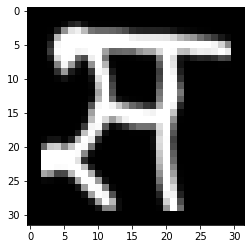

In [ ]:
test_img = X_test.reshape(X_test.shape[0],img_width,img_height)
plt.imshow(test_img[10],cmap=plt.get_cmap('gray'))

In [ ]:
np.argmax(y_test[10])

31

In [ ]:
np.argmax(predictions[10])

31

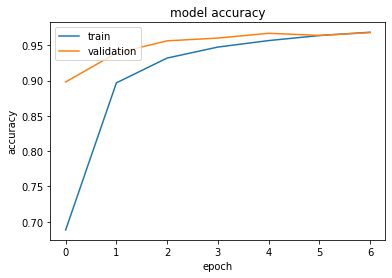

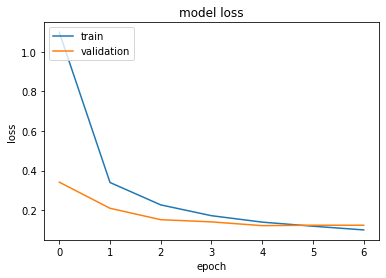

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]
y_test_labels = [np.argmax(i) for i in y_test]

confusoinMatrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=predicted_labels)

In [ ]:
print(classification_report(y_test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       418
           1       0.97      0.97      0.97       429
           2       0.98      0.98      0.98       417
           3       0.96      0.88      0.91       417
           4       0.95      0.95      0.95       406
           5       0.97      0.99      0.98       392
           6       0.94      0.98      0.96       392
           7       0.99      0.93      0.96       376
           8       0.99      0.98      0.98       381
           9       0.94      0.99      0.97       404
          10       0.97      0.95      0.96       388
          11       0.98      0.96      0.97       403
          12       0.96      0.95      0.95       388
          13       0.95      0.97      0.96       393
          14       0.99      0.98      0.98       363
          15       0.96      0.98      0.97       376
          16       0.97      0.80      0.88       388
          17       0.95    

Text(159.0, 0.5, 'Real Values')

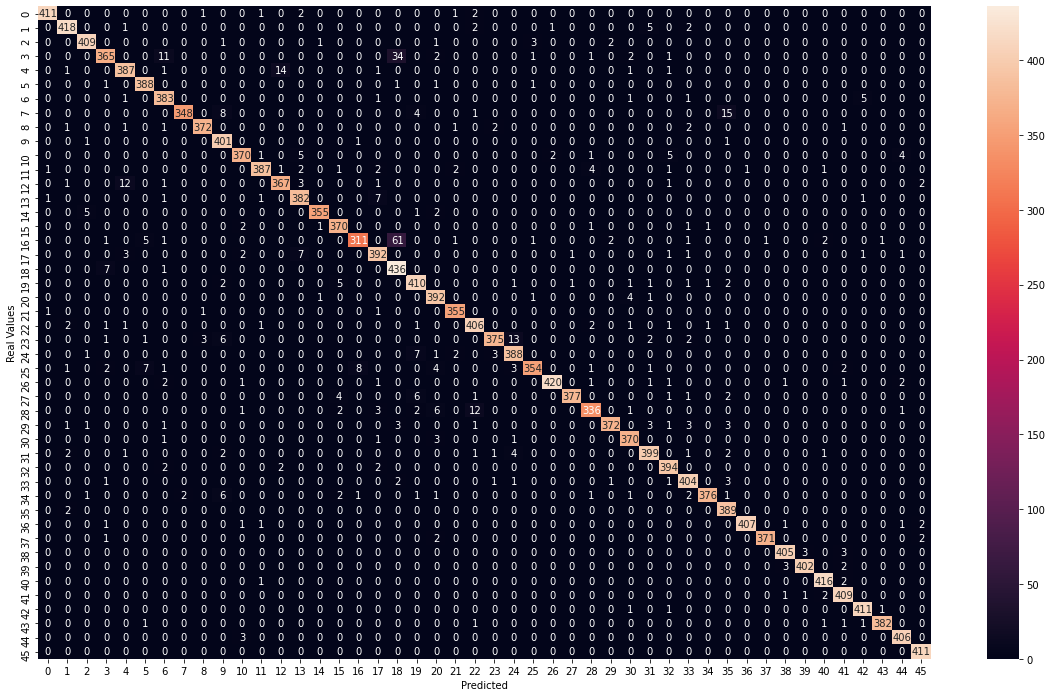

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')